# TP4 - Descente de gradient en 2 variables

### Import des librairies

In [2]:
from matplotlib import pyplot as plt
import numpy as np

> On définit une fonction python permettant de dessiner les courbes de niveaux d'une fonction de 2 variables

In [3]:
def niveaux(fct, x1_min=-5, x2_min=-5, x1_max=5, x2_max=5):
    x1_values = np.linspace(x1_min, x1_max,100)
    x2_values = np.linspace(x2_min, x2_max,100)
    fct_values = [[fct(x1,x2) for x1 in x1_values] for x2 in x2_values]
    plt.contour(x1_values, x2_values, fct_values, 40)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.colorbar()
    plt.xlabel('$b$')
    plt.ylabel('$w$')

## Problème

On considère les points $(3,4)$, $(1,0)$ et $(7,6)$ et on cherche $(b,w)$ minimisant la somme des carrés des distances verticales entre les points et la droite d'équation $y=b+wx$.

1. Expliciter la fonction $(b,w)\mapsto f(b,w)$ à minimiser.
2. La fonction $f$ étant convexe, son minimum est atteint là où le gradient s'annule.
Calculer le gradient de $f$.


### Définitions de la fonction et de son gradient

Compléter les fonctions python `f` et `df` suivantes, renvoyant respectivement la valeur de $f$ et les valeurs du gradient de $f$.

In [5]:
# Fonction à optimiser
def f(b,w):
  return ...

# Gradient
def df(b,w):
  return [...,...]

### Représentation graphique de $f$

On représente les courbes de niveaux de $f$ via la fonction `niveaux(.)` définie ci-dessus.

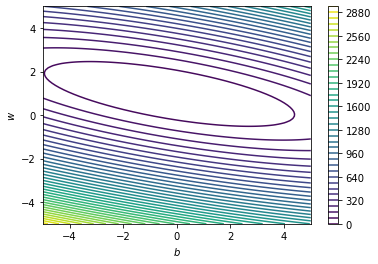

In [6]:
niveaux(f)

**Exercice 2**

1. Par lecture du graphique ci-dessus, déterminer :
    1. Une valeur approximative des coordonnées du point critique de $f$ ;
    2. Les signes du gradient (parmi $(+,+)$, $(-,-)$, $(+,-)$ ou $(-,+)$) en chacun des points suivants :    
    (a) $(b,w)=(-2,3)$ ; (b) $(b,w)=(2,-2)$ ; (c) $(b,w)=(0,-4)$.
    3. Comment expliquer l'allule allongée des ellipses $f$ ?
2. Déterminer par le calcul la valeur exacte $(b^*,w^*)$ du point critique.
3. En partant de $(b[0],w[0])=(-2,2)$, et d'après `df(-2,2)=[12, 84]` :
    1. Quelle sont les coordonnées $(b[1],w[1])$ obtenues à l'issue de la première itération de l'algorithme de descente de descente de gradient, dans les cas suivants : <br/> (a) $\tau=1$ ; (b) $\tau=1e-2$ (soit $0.01$); (c) $\tau=1e-5$ (soit $0.00001$).
    2. Parmi ces valeurs de $\tau$, quelle est la valeur la plus performante pour cette première itération ? (c'est à dire se rapprochant le plus de $(b^*,w^*)$) ?

## Algorithme

**Exercice 3**

La fonction python `descente` définie ci-dessous implémente l'algorithme de descente de gradient.
Par lecture de l'algorithme, expliquer le rôle de chacun des paramètres :
- `gradf`
- `W0`
- `tau`
- `tolerance`
- `nbiterations`

La fonction renvoie une liste `L`. Que contient cette liste ?

In [7]:
def descente(gradf,W0,tau=0.01,tolerance=1e-6,nbiterations=1000):
    b=W0[0]
    w=W0[1]
    L=[]
    for i in range(nbiterations):
        g = gradf(b,w)
        if g[0]**2+g[1]**2< tolerance:
            print('L\'algorithme a convergé en',i,'itérations. \nSolution atteinte :\n b=',b,'\n w=',w,'\nGradient :',g)
            return L
        L.append([b,w])
        b=b-tau*g[0]
        w=w-tau*g[1]
    print('L\'algorithme n\'a pas convergé.\n Solution atteinte :\n b=',b,'\n w=',w,'\nGradient :',g)
    return L

### Calcul de la solution via la descente de gradient

In [14]:
Wlist=descente(df,[-4,4],1e-2,1e-4,1000)

L'algorithme a convergé en 363 itérations. 
Solution atteinte :
 b= -0.07669449221187702 
 w= 0.9295687067990768 
Gradient : [-0.009655403691573472, 0.0018285736297620758]


### Représentation graphique de la trajectoire

In [6]:
# Fonction Python permettant de dessiner la trajectoire de l'algorithme de descente de gradient 
# Wlist contient les points atteints sous la forme d'une liste  coordonnées [[w00,b0],[w01,b1],...]
def trajectoire(Wlist, fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5, w_opt=None, ax=None):
    niveaux(fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5)     
    if len(Wlist) > 0:
        trajet = np.array(Wlist)
        plt.plot(trajet[:,0], trajet[:,1], 'o--')
    plt.title('Trajectoire de la descente de gradient')

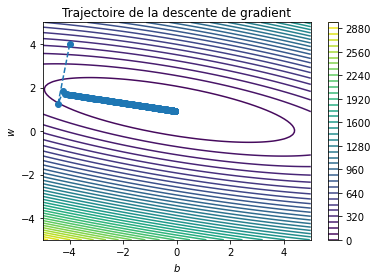

In [12]:
trajectoire(Wlist,f)

**Exercice 4.**

En utilisant la cellule python ci-dessous :

1. À partir de $W_0=(-4,4)$, visualiser et interpréter la trajectoire dans les cas suivants :
    1. $\tau=0.015$, tolerance=1e-2, nbiterations=1000 ;
    2. $\tau=0.02$, tolerance=1e-2, nbiterations=5
2. À partir de $W_0=(-4,4)$, et avec un pas $\tau=10^{-3}$, donner, à 4 décimales près, la tolérance en-deçà de laquelle l'algorithme ne converge pas en au plus 3000 itérations.


In [ ]:
Wlist=descente(df,[-4,4],1e-2,1e-4,1000) #Paramètres : gradient de f,W0,tau,tolerance,nbiterations
trajectoire(Wlist,f)

**Exercice 5.**

Utiliser les cellules ci-dessous pour déterminer une valeur approximative de la droite de régression pour les données $(1,6)$, $(2,8)$, $(3,7)$, $(4,9)$ par la méthode de la descente de gradient.